## DAT_12_SF Midterm
____________________--

### About the data
For this midterm, you'll be working with a dataset related to classifying emails as spam. The dataset was built by researchers at the UCI Machine Learning Institute

Data Set Information:

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography... 



Attribute Information:

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. 

###Definitions of the attributes: 
_______________-

####48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. 

####6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail 

####1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters 

####1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters 

####1 continuous integer [1,...] attribute of type capital_run_length_total 
= sum of length of uninterrupted sequences of capital letters 
= total number of capital letters in the e-mail 

####1 nominal {0,1} class attribute of type spam 
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 

In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors, datasets, feature_selection
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import statsmodels.formula.api as smf
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',60)

%matplotlib inline

In [228]:
# Load the spambase.csv as a pandas DataFrame (last column of data contains Target Data - is_spam)
spam_data = pd.read_csv("spambase.csv")
#spam_data.head()
spam_data.describe()
#spam_data.info()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

###Exercise 1: Explore the dataset and display some visualizations showing how the variables relate to each other


In [229]:
#39% of the entries were spam
#We could be 61% accurate predicting it's not spam every time.
spam_data.is_spam.mean()

0.39404477287546186

In [230]:
#A look at the average values for spam vs not spam
spam_data.groupby('is_spam').mean()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
is_spam,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.073479,0.244466,0.200581,0.000886,0.181040,0.044544,0.009383,0.038415,0.038049,0.167170,0.021711,0.536324,0.061664,0.042403,0.008318,0.073587,0.048346,0.097292,1.270341,0.007579,0.438702,0.045226,0.007088,0.017138,0.895473,0.431994,1.265265,0.193806,0.162794,0.165854,0.106033,0.077306,0.150986,0.077787,0.169455,0.141671,0.197744,0.018723,0.121679,0.083117,0.072027,0.216808,0.070581,0.126636,0.415760,0.287184,0.008192,0.051227,0.050281,0.158578,0.022684,0.109984,0.011648,0.021713,2.377301,18.214491,161.470947
1,0.152339,0.164650,0.403795,0.164672,0.513955,0.174876,0.275405,0.208141,0.170061,0.350507,0.118434,0.549972,0.143547,0.083574,0.112079,0.518362,0.287507,0.319228,2.264539,0.205521,1.380370,0.238036,0.247055,0.212879,0.017479,0.009173,0.001550,0.018798,0.000684,0.005968,0.001274,0.000518,0.014562,0.001776,0.006928,0.029515,0.043469,0.004710,0.012427,0.036718,0.000055,0.002443,0.008450,0.006244,0.125091,0.014727,0.001219,0.002101,0.020573,0.108970,0.008199,0.513713,0.174478,0.078877,9.519165,104.393271,470.619415


In [231]:
print spam_data.corr().applymap('{:.2f}'.format)
#correlation of all variables, not terrific to look at, pairplot was overworked by size of data

                           word_freq_make word_freq_address word_freq_all  \
word_freq_make                       1.00             -0.02          0.07   
word_freq_address                   -0.02              1.00         -0.03   
word_freq_all                        0.07             -0.03          1.00   
word_freq_3d                         0.01             -0.01         -0.02   
word_freq_our                        0.02             -0.02          0.08   
word_freq_over                       0.06             -0.02          0.09   
word_freq_remove                     0.01              0.00          0.04   
word_freq_internet                  -0.00             -0.02          0.01   
word_freq_order                      0.11             -0.00          0.09   
word_freq_mail                       0.04              0.03          0.03   
word_freq_receive                    0.19             -0.01          0.05   
word_freq_will                       0.11             -0.04          0.08   

In [232]:
#correlation for spam
#print spam_data.corr().applymap('{:.2f}'.format)['is_spam']

In [233]:
#correlations of all word frequency columns
#word_cols = []
#for x in spam_data.columns:
#    if 'word_freq' in x:
#        word_cols.append(x)
#spam_data[word_cols].corr().applymap('{:.2f}'.format)

###Exercise 2: Build a simple logistic regression and visualize it

use the variable "capital_run_length_longest" to predict "is_spam"
How accurate is this single feature?

In [234]:
y = spam_data["is_spam"]
x = spam_data[['capital_run_length_longest']]

In [235]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(x, y)
model.score(x, y)
#73% accuracy, better than the mean 61% 

0.72549445772658117

In [236]:
print metrics.confusion_matrix(y, y_hat)
print metrics.classification_report(y, y_hat)
#Not very good recall for Spam, meaning we there is a lot of spam that goes unnoticed.
#Only 8% of non-spam was marked as spam

[[2567  221]
 [1042  771]]
             precision    recall  f1-score   support

          0       0.71      0.92      0.80      2788
          1       0.78      0.43      0.55      1813

avg / total       0.74      0.73      0.70      4601



### Exercise 3: Use train-test spit to split your data at a 30% mark and run another logistic regression using all variables
use random state = 12 so that we can compare results

In [237]:
datacols = spam_data.columns[0:-1]
data = spam_data[datacols]
target = spam_data.is_spam
# Create the training (and test) set
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=12)

In [238]:
model_train = LogisticRegression()
model_train = model_train.fit(x_train, y_train)
print model_train.score(x_train, y_train)
#fits the training data well
print model_train.score(x_test, y_test)
#and test data even better??

0.927639751553
0.932657494569


###Exercise 4: Apply Crossvalidation to see how the model fares across different splits of your date

#### Use crossvalidation to score model

In [239]:
#Try model in different sections of data
scores = cross_val_score(LogisticRegression(), data, target, scoring='accuracy', cv=5)
print scores
print scores.mean()

[ 0.92073833  0.92833876  0.93051031  0.94668118  0.83677911]
0.912609537582


### Exercise 5: Compare Performance of Logistic Regression to KNN with 3 neighbors
-Which model is more accurate?

In [240]:
#First should scale data for KNN
from sklearn.preprocessing import scale
data_norm = scale(data)
data_norm = pd.DataFrame(data_norm, columns = datacols)
data_norm.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,-0.342434,0.330885,0.712859,-0.0469,0.011565,-0.350266,-0.291794,-0.262562,-0.323302,-0.371364,-0.296860,0.114087,-0.312055,-0.174927,-0.190114,0.086171,-0.321135,2.081207,0.150905,-0.167893,0.125128,-0.118172,-0.290209,-0.212994,-0.328815,-0.29924,-0.227895,-0.23183,-0.166731,-0.22524,-0.160539,-0.143212,-0.17492,-0.145215,-0.198067,-0.24213,-0.323456,-0.059836,-0.180911,-0.185304,-0.120905,-0.1726,-0.205993,-0.127343,-0.297776,-0.197387,-0.071388,-0.111546,-0.158453,-0.514307,-0.155198,0.624007,-0.308355,-0.103048,-0.045247,0.045298,-0.008724
1,0.345359,0.051909,0.435130,-0.0469,-0.256117,0.672399,0.244743,-0.088010,-0.323302,1.086711,0.745206,0.288181,1.847391,0.451663,0.350812,-0.131825,-0.163480,0.179367,1.018370,-0.167893,0.649831,-0.118172,0.937491,0.758565,-0.328815,-0.29924,-0.227895,-0.23183,-0.166731,-0.22524,-0.160539,-0.143212,-0.17492,-0.145215,-0.198067,-0.24213,-0.158129,-0.059836,-0.180911,-0.185304,-0.120905,-0.1726,-0.205993,-0.127343,-0.297776,-0.197387,-0.071388,-0.111546,-0.158453,-0.026007,-0.155198,0.126203,0.423783,0.008763,-0.002443,0.250563,1.228324
2,-0.145921,-0.165072,0.851723,-0.0469,1.364846,0.343685,0.193644,0.036670,1.974017,0.016422,1.588784,-0.106431,0.086612,-0.174927,6.571464,-0.228712,-0.186002,1.591624,-0.170169,0.459913,-0.249659,-0.118172,3.021726,-0.077428,-0.328815,-0.29924,-0.227895,-0.23183,-0.166731,-0.22524,-0.160539,-0.143212,-0.17492,-0.145215,-0.198067,-0.24213,-0.323456,-0.059836,-0.180911,-0.013815,-0.120905,-0.1726,0.330230,-0.127343,-0.238463,-0.131527,-0.071388,-0.111546,-0.117376,0.014684,-0.155198,0.008496,0.440053,-0.079754,0.145921,2.221106,3.258733
3,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,1.241428,-0.268919,0.717835,-0.174927,-0.190114,0.074061,-0.321135,-0.347876,0.855017,-0.167893,-0.416232,-0.118172,-0.290209,-0.212994,-0.328815,-0.29924,-0.227895,-0.23183,-0.166731,-0.22524,-0.160539,-0.143212,-0.17492,-0.145215,-0.198067,-0.24213,-0.323456,-0.059836,-0.180911,-0.185304,-0.120905,-0.1726,-0.205993,-0.127343,-0.297776,-0.197387,-0.071388,-0.111546,-0.158453,-0.007511,-0.155198,-0.161934,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222
4,-0.342434,-0.165072,-0.556761,-0.0469,0.472573,-0.350266,0.500237,1.308402,0.789462,0.605857,1.241428,-0.268919,0.717835,-0.174927,-0.190114,0.074061,-0.321135,-0.347876,0.855017,-0.167893,-0.416232,-0.118172,-0.290209,-0.212994,-0.328815,-0.29924,-0.227895,-0.23183,-0.166731,-0.22524,-0.160539,-0.143212,-0.17492,-0.145215,-0.198067,-0.24213,-0.323456,-0.059836,-0.180911,-0.185304,-0.120905,-0.1726,-0.205993,-0.127343,-0.297776,-0.197387,-0.071388,-0.111546,-0.158453,-0.014910,-0.155198,-0.164387,-0.308355,-0.103048,-0.052150,-0.062466,-0.152222


In [241]:
# Create the training (and test) set
x_train2, x_test2, y_train2, y_test2 = train_test_split(data_norm, target, test_size=0.3, random_state=12)

In [242]:
#Determine proper value of N to use
# Loop through each neighbors value from 1 to 51 and append
# the scores
n_neighbors = range(1,51,2)
scores = []
for n in n_neighbors:
    clf = neighbors.KNeighborsClassifier(n)
    clf.fit(x_train2, y_train2)
    scores.append(clf.score(x_test2, y_test2))
#scores
#Best score for N is 9

In [243]:
clf = neighbors.KNeighborsClassifier(9, weights='uniform')
scores = cross_val_score(clf, data_norm, target, cv=5)
print scores
print scores.mean()
#Not as accurate as logistic regression

[ 0.87839305  0.89793702  0.92399566  0.9085963   0.78346028]
0.878476463228


### Exercise 6: Evaluate Feature Importance
Which features are the most influential in this model?

In [244]:
df_train = pd.DataFrame(x_train, columns = datacols)

In [245]:
#Which are the significant parameters in the logistic regression model
#Use stats models logit fit to drill into coefficients
logit = smf.Logit(y_train, df_train)
logit_fit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.206731
         Iterations 15


In [246]:
#Only look look at parameters with a p-value less than .05
sig_params = logit_fit.params[logit_fit.pvalues <= .05]

In [247]:
sig_params.map(np.exp)
sig_params.abs().order(ascending = False)
#Of the statistically significant params, this is the order of impact on the prediction of the model
#Shows the increase due to one unit change in each param.
#Unfairly weighted towards the frequency scores, since the scales are much smaller.
#We should use normalized data and look again.

word_freq_george              7.746965
char_freq_$                   6.325513
word_freq_conference          4.941566
word_freq_meeting             3.332726
char_freq_#                   2.819688
word_freq_hp                  2.817753
word_freq_edu                 2.568184
word_freq_project             2.219813
word_freq_000                 2.137179
char_freq_;                   2.124628
word_freq_remove              1.856074
char_freq_(                   1.074972
word_freq_re                  1.022837
word_freq_data                0.888777
word_freq_business            0.807688
word_freq_free                0.754601
word_freq_make                0.691611
word_freq_our                 0.631979
word_freq_will                0.411770
word_freq_mail                0.285140
word_freq_address             0.248242
char_freq_!                   0.204766
word_freq_your                0.201623
word_freq_you                 0.084605
capital_run_length_longest    0.007815
capital_run_length_total 

In [248]:
#Performing same steps using normalized training data
df_train_norm = pd.DataFrame(x_train2, columns = datacols)
logit_norm = smf.Logit(y_train, df_train_norm)
logit_fit_norm = logit_norm.fit()
sig_params_norm = logit_fit_norm.params[logit_fit_norm.pvalues <= .05]
sig_params_norm.map(np.exp)
sig_params_norm.abs().order(ascending = False)
#When normalized to the scale of the data, we see the greater importance of the non-frequency measures

Optimization terminated successfully.
         Current function value: 0.217737
         Iterations 12


word_freq_3d                  30.876333
word_freq_george               3.020832
word_freq_hp                   2.582210
char_freq_$                    1.850453
capital_run_length_longest     1.493678
word_freq_edu                  1.368429
word_freq_000                  1.349713
char_freq_#                    1.180911
word_freq_meeting              1.059843
word_freq_remove               0.955741
word_freq_project              0.877250
word_freq_re                   0.785967
word_freq_free                 0.736088
word_freq_credit               0.599998
word_freq_font                 0.596146
word_freq_lab                  0.593919
char_freq_;                    0.522278
word_freq_our                  0.521388
word_freq_business             0.416612
word_freq_technology           0.358823
word_freq_your                 0.330323
word_freq_data                 0.323829
capital_run_length_total       0.291721
word_freq_mail                 0.254191
char_freq_!                    0.249533


### Exercise 7: Plot the ROC Curve for the logistic regression you chose

In [249]:
probas_ = model_train.predict_proba(x_test)

# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
print "Area under the ROC curve : %f" % roc_auc

Area under the ROC curve : 0.968486


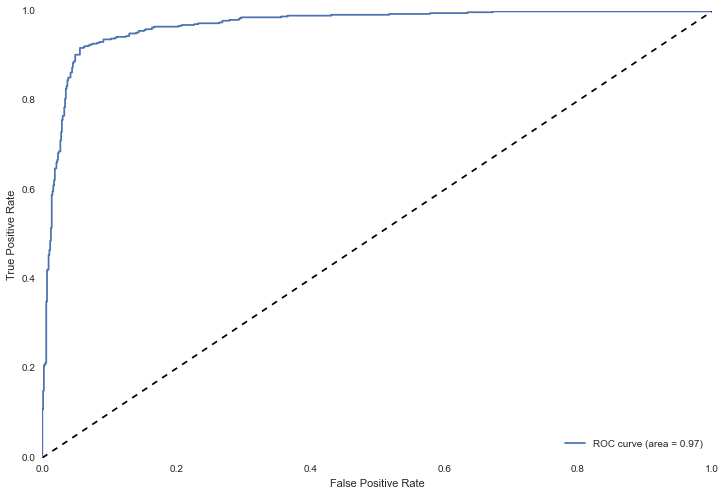

In [250]:
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

### Exercise 8: Demonstrate how the accurary of your predictions changes when you set your threshold to levels other than 50%

In [251]:
#Pull the predicted probabilities of spam in xtest, and take second value for prob of spam
prob_spam = map(lambda x: x[1], probas_)
test_df = pd.DataFrame(y_test,columns=['actual'])
test_df['prob_spam'] = prob_spam
test_df['50thresh'] = model_train.predict(x_test) #50% Threshold
test_df.head()

,actual,prob_spam,50thresh
0,1,9.999796e-01,1
1,0,1.753287e-03,0
2,0,1.195391e-23,0
3,0,1.224453e-10,0
4,0,3.287729e-01,0


In [252]:
test_df['40thresh'] = map(lambda x: 1 if x > 0.4 else 0, test_df['prob_spam'])
test_df['20thresh'] = map(lambda x: 1 if x > 0.2 else 0, test_df['prob_spam'])
test_df['60thresh'] = map(lambda x: 1 if x > 0.6 else 0, test_df['prob_spam'])
test_df['80thresh'] = map(lambda x: 1 if x > 0.8 else 0, test_df['prob_spam'])
test_df.head()
#Create predictions with different thresholds. Default is 50%, but try what happens when we move it

,actual,prob_spam,50thresh,40thresh,20thresh,60thresh,80thresh
0,1,9.999796e-01,1,1,1,1,1
1,0,1.753287e-03,0,0,0,0,0
2,0,1.195391e-23,0,0,0,0,0
3,0,1.224453e-10,0,0,0,0,0
4,0,3.287729e-01,0,0,1,0,0


In [253]:
print '50% Threshold:'
print metrics.accuracy_score(test_df.actual, test_df['50thresh'])
print metrics.classification_report(test_df.actual, test_df['50thresh'])
print '40% Threshold:'
print metrics.accuracy_score(test_df.actual, test_df['40thresh'])
print metrics.classification_report(test_df.actual, test_df['40thresh'])
print '20% Threshold:'
print metrics.accuracy_score(test_df.actual, test_df['20thresh'])
print metrics.classification_report(test_df.actual, test_df['20thresh'])
print '60% Threshold:'
print metrics.accuracy_score(test_df.actual, test_df['60thresh'])
print metrics.classification_report(test_df.actual, test_df['60thresh'])
print '80% Threshold:'
print metrics.accuracy_score(test_df.actual, test_df['80thresh'])
print metrics.classification_report(test_df.actual, test_df['80thresh'])

50% Threshold:
0.932657494569
             precision    recall  f1-score   support

          0       0.94      0.95      0.95       855
          1       0.92      0.90      0.91       526

avg / total       0.93      0.93      0.93      1381

40% Threshold:
0.926140477915
             precision    recall  f1-score   support

          0       0.95      0.93      0.94       855
          1       0.88      0.93      0.91       526

avg / total       0.93      0.93      0.93      1381

20% Threshold:
0.879073135409
             precision    recall  f1-score   support

          0       0.98      0.83      0.89       855
          1       0.77      0.97      0.86       526

avg / total       0.90      0.88      0.88      1381

60% Threshold:
0.918899348298
             precision    recall  f1-score   support

          0       0.91      0.96      0.94       855
          1       0.93      0.85      0.89       526

avg / total       0.92      0.92      0.92      1381

80% Threshold:
0.872

###Exercise 9: Discuss the pro's/con's of moving the threshold away from 50%, why is/isn't this a good idea? 

###Bonus: Apply PCA to the features and visualize the data in two dimensions: 

In [254]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)
pca.fit(data_norm)
X_pca = pca.transform(data_norm)

In [255]:
X_pca

array([[-0.28500744, -0.02380256],
       [-0.46157567,  1.14397429],
       [-0.57160996,  2.7792371 ],
       ..., 
       [-0.10199807, -0.23114607],
       [-0.2297305 , -0.36586923],
       [-0.28775681, -0.35817837]])

In [256]:
df_pca = pd.DataFrame(X_pca[:,0], columns = ['pca1'])
df_pca['pca2'] = X_pca[:,1]
df_pca['target'] = target
df_pca.head()

,pca1,pca2,target
0,-0.285007,-0.023803,1
1,-0.461576,1.143974,1
2,-0.571610,2.779237,1
3,-0.313673,0.236503,1
4,-0.314036,0.236085,1


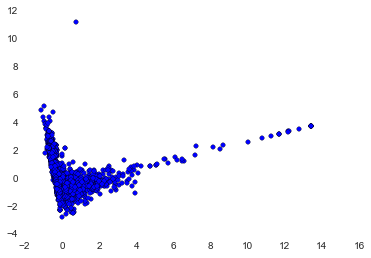

In [257]:
plt.scatter(df_pca.pca1, df_pca.pca2, cmap = df_pca.target)